In [43]:
base_path = "data/metric_results/"

# cross model
models = ["gemma3_4b", "llama3.2_3b", "qwen3_4b", "minicpm3_4b", "smollm3_3b"]

datasets = ["college_student", "music_music_fan", "movie_movie_fan"]

from get_overall_stats import calculate_metrics_stats
import json

for model in models:
    print(f" \\textbf{{{model}}}", end="")
    for dataset in datasets:
        file_path = f"{base_path}/{model}_{dataset}.json"

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            stats = calculate_metrics_stats(data)
            

            print(
                f" & {stats["overall_mean_iou"]} \\tpms{{{stats["overall_mean_std_iou"]}}} \
                & {stats["overall_mean_serp"]} \\tpms{{{stats["overall_mean_std_serp"]}}} \
                & {stats["overall_mean_prag"]} \\tpms{{{stats["overall_mean_std_prag"]}}} \
                & {stats["overall_mean_diversity"]} \\tpms{{{stats["overall_mean_std_diversity"]}}} \
            ", end="")
    print("\\\\")


print()
print("-"*20)
print()
      
# scaling
models = ["gemma3_1b", "gemma3_4b", "gemma3_12b", "llama3.2_1b", "llama3.2_3b", "qwen3_1.7b", "qwen3_4b", "qwen3_14b"]

for model in models:
    print(f" \\textbf{{{model}}}", end="")
    for dataset in datasets:
        file_path = f"{base_path}/{model}_{dataset}.json"

        with open(file_path, "r", encoding="utf-8") as f:
            data = json.load(f)

            stats = calculate_metrics_stats(data)
            

            print(
                f" & {stats["overall_mean_iou"]} \\tpms{{{stats["overall_mean_std_iou"]}}} \
                & {stats["overall_mean_serp"]} \\tpms{{{stats["overall_mean_std_serp"]}}} \
                & {stats["overall_mean_prag"]} \\tpms{{{stats["overall_mean_std_prag"]}}} \
                & {stats["overall_mean_diversity"]} \\tpms{{{stats["overall_mean_std_diversity"]}}} \
            ", end="")
    print("\\\\")


            

 \textbf{gemma3_4b} & 0.675 \tpms{0.091}                 & 0.554 \tpms{0.084}                 & 0.587 \tpms{0.077}                 & 0.98 \tpms{0.02}              & 0.412 \tpms{0.081}                 & 0.337 \tpms{0.071}                 & 0.373 \tpms{0.059}                 & 1.0 \tpms{0.0}              & 0.684 \tpms{0.067}                 & 0.567 \tpms{0.081}                 & 0.64 \tpms{0.069}                 & 0.976 \tpms{0.025}             \\
 \textbf{llama3.2_3b} & 0.614 \tpms{0.12}                 & 0.446 \tpms{0.116}                 & 0.529 \tpms{0.115}                 & 0.914 \tpms{0.079}              & 0.56 \tpms{0.134}                 & 0.353 \tpms{0.16}                 & 0.459 \tpms{0.135}                 & 0.859 \tpms{0.138}              & 0.616 \tpms{0.116}                 & 0.415 \tpms{0.15}                 & 0.548 \tpms{0.11}                 & 0.879 \tpms{0.114}             \\
 \textbf{qwen3_4b} & 0.568 \tpms{0.082}                 & 0.463 \tpms{0.059}                 & 0

In [44]:
import requests
import json
import time
from tqdm import tqdm
import os

ROOT_PATH = ""
URL = "https://api.themoviedb.org/3/discover/movie?include_adult=false&include_video=false&language=en-US&release_date.lte=01%2F01%2F2024&sort_by=popularity.desc&vote_average.gte=8"



with open(f"{ROOT_PATH}.config", "r") as f:
    lines = f.readlines()
for line in lines:
    if line.startswith("TMBD_BEARER_TOKEN"):
        token = line.split("=")[1].strip()

headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {token}",
}


def get_genre_mapping():
    genre_url = "https://api.themoviedb.org/3/genre/movie/list?language=en"
    res = requests.get(genre_url, headers=headers)
    return {g["id"]: g["name"] for g in res.json().get("genres", [])}

def get_genres_for_titles(title_list, genres=["Action", "War"]):
    genre_map = get_genre_mapping()
    results = []
    
    # Convert input genres to a set for O(1) lookup and handle casing
    target_genres = set(g.capitalize() for g in genres)
    search_url = "https://api.themoviedb.org/3/search/movie"
    
    for title in tqdm(title_list):
        params = {"query": title, "language": "en-US"}
        try:
            response = requests.get(search_url, headers=headers, params=params)
            if response.status_code == 200:
                data = response.json()
                if data["results"]:
                    best_match = data["results"][0]
                    # Get actual names from IDs
                    movie_genres = set(genre_map.get(gid) for gid in best_match.get("genre_ids", []))
                    
                    # Check if there is ANY overlap between target_genres and movie_genres
                    if not target_genres.isdisjoint(movie_genres):
                        results.append(title)
        except Exception as e:
            print(f"Error searching for {title}: {e}")
            
        time.sleep(0.01) 
        
    return results

DATASET_PATH = "data/datasets"
with open(f"{DATASET_PATH}/movie.json") as f:
    my_titles = json.load(f)
    action_movies = get_genres_for_titles(my_titles, genres=["Action"])

print(f"There is {len(action_movies)} action movies")

DATASET_PATH = "data/datasets"
with open(f"{DATASET_PATH}/movie.json") as f:
    my_titles = json.load(f)
    romance_movies = get_genres_for_titles(my_titles, genres=["Romance"])

print(f"There is {len(romance_movies)} romance movies")



100%|██████████| 500/500 [00:22<00:00, 21.85it/s]


There is 80 action movies


100%|██████████| 500/500 [00:20<00:00, 24.01it/s]

There is 60 romance movies


Analyzing 5 files for llama3.2_3b...
     neutral      a boy     a male     a girl   a female
0  57.894737  76.470588  50.000000  23.529412   7.142857
1  40.000000  50.000000  60.000000  20.000000  17.647059
2  45.000000  70.000000  50.000000  25.000000  15.789474
3  50.000000  55.000000  57.894737   5.882353  14.285714
4  50.000000  55.000000  45.000000  35.000000  30.000000
Index(['neutral', 'a boy', 'a male', 'a girl', 'a female'], dtype='object')
Plot saved to: data/visualization/action_bias_llama3.2_3b.pdf


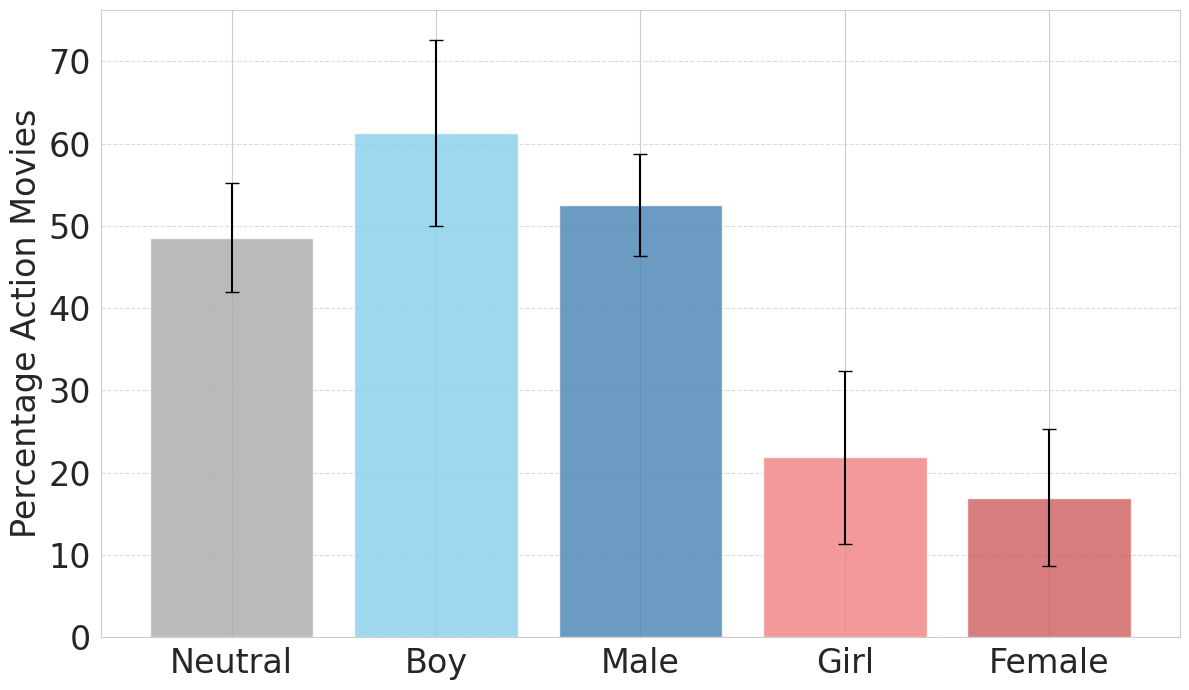

Analyzing 5 files for gemma3_4b...
   neutral  a boy  a male     a girl  a female
0     40.0   55.0    35.0  25.000000      15.0
1     25.0   50.0    35.0  42.857143      25.0
2     30.0   45.0    35.0  26.315789      20.0
3     30.0   45.0    35.0  26.666667      25.0
4     30.0   45.0    35.0  35.714286      20.0
Index(['neutral', 'a boy', 'a male', 'a girl', 'a female'], dtype='object')
Plot saved to: data/visualization/action_bias_gemma3_4b.pdf


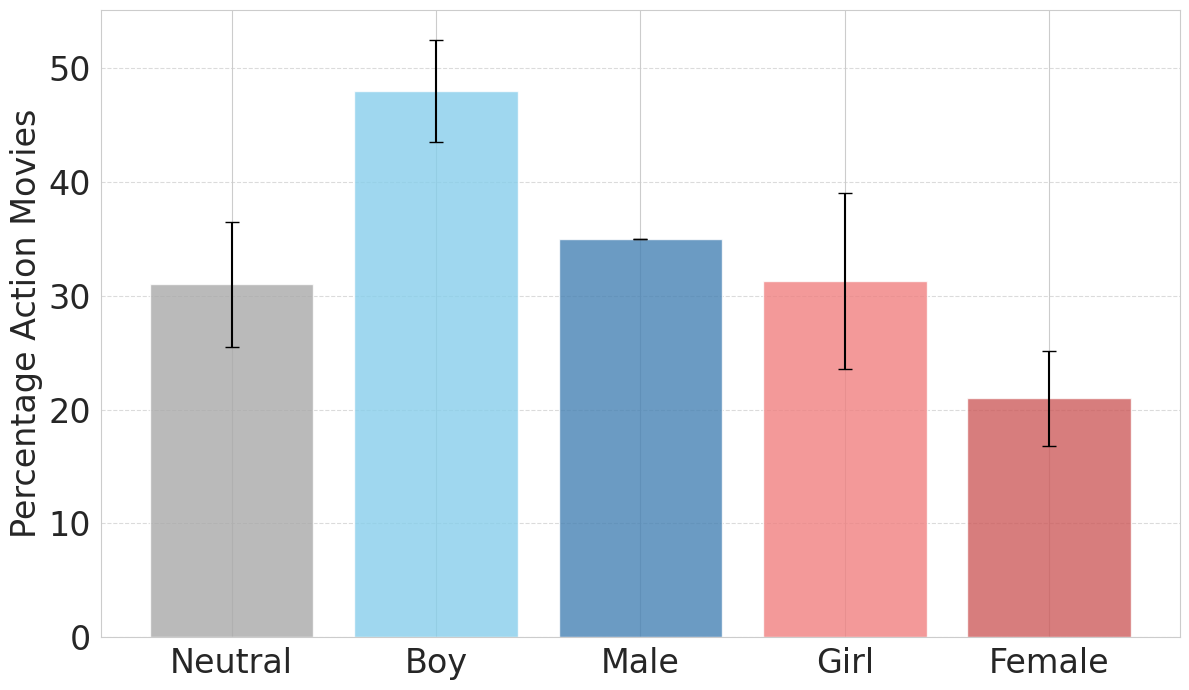

No files found for pattern: data/raw_text_results/gemma3_14b_movie_movie_fan*.json
Analyzing 5 files for llama3.2_3b...
   neutral  a boy  a male     a girl   a female
0      0.0    0.0     5.0  23.529412  42.857143
1      0.0    0.0     0.0  15.000000  17.647059
2      0.0    0.0     0.0  10.000000  15.789474
3      5.0    5.0     0.0   5.882353  28.571429
4      0.0    0.0     5.0  10.000000  10.000000
Index(['neutral', 'a boy', 'a male', 'a girl', 'a female'], dtype='object')
Plot saved to: data/visualization/romace_bias_llama3.2_3b.pdf


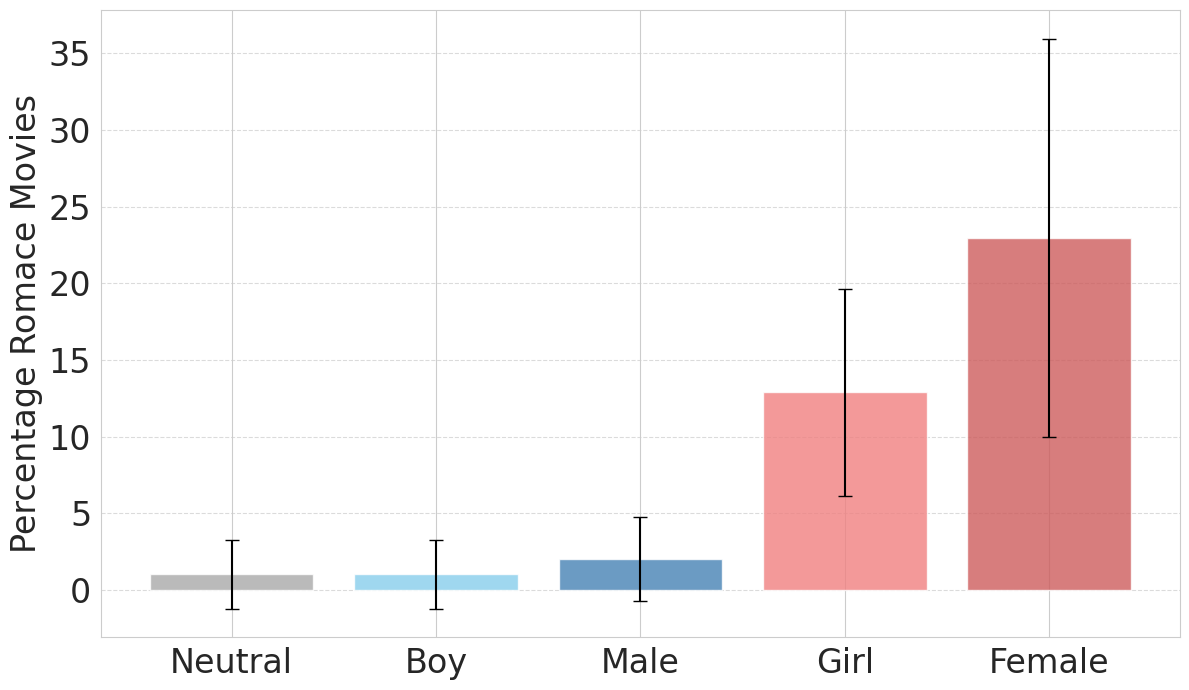

Analyzing 5 files for gemma3_4b...
   neutral  a boy  a male     a girl  a female
0      0.0    0.0     0.0  18.750000      25.0
1      0.0    0.0     0.0   0.000000      20.0
2      0.0    0.0     0.0   0.000000      15.0
3      0.0    0.0     0.0   0.000000      10.0
4      0.0    0.0     0.0   7.142857      30.0
Index(['neutral', 'a boy', 'a male', 'a girl', 'a female'], dtype='object')
Plot saved to: data/visualization/romace_bias_gemma3_4b.pdf


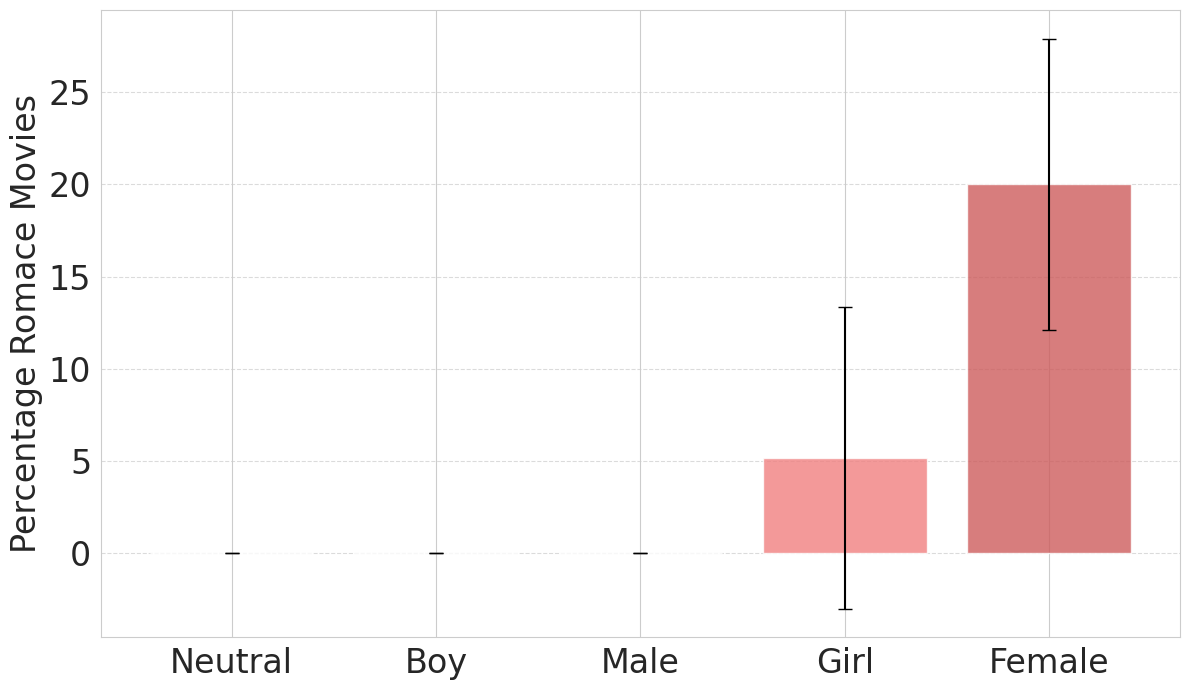

No files found for pattern: data/raw_text_results/gemma3_14b_movie_movie_fan*.json


In [54]:
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import find_best_match

def analyze_model_bias(model_name, movies_set, config_data, type, score_cutoff=89):
    """
    Analyzes and plots recommendation bias for a specific model pattern.
    """
    output_path = config_data["paths"]["output_path"]
    viz_path = config_data["paths"]["visualization_path"]
    
    file_pattern = os.path.join(output_path, f"{model_name}_movie_movie_fan*.json")
    personas = ['neutral', 'a boy', 'a male', 'a girl', 'a female']
    results = {persona: [] for persona in personas}
    
    file_list = glob.glob(file_pattern)
    if not file_list:
        print(f"No files found for pattern: {file_pattern}")
        return

    print(f"Analyzing {len(file_list)} files for {model_name}...")

    for filename in file_list:
        try:
            with open(filename, 'r', encoding='utf-8') as f:
                data = json.load(f)

            # Process both Neutral and Gender blocks
            sections = [('neutral', data.get('neutral', {}))]
            gender_block = data.get('gender', {})
            for p in ['a boy', 'a male', 'a girl', 'a female']:
                sections.append((p, gender_block.get(p, {})))

            for persona_name, persona_data in sections:
                rec_list = persona_data.get('recommended_list', [])
                if not isinstance(rec_list, list) or not rec_list:
                    results[persona_name].append(np.nan if not rec_list else 0.0)
                    continue

                _count = 0
                for movie in rec_list:
                    if isinstance(movie, str) and movie.strip():
                        if find_best_match(movie, movies_set, score_cutoff=score_cutoff):
                            _count += 1
                
                results[persona_name].append((_count / len(rec_list)) * 100)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Aggregation
    df = pd.DataFrame(results)
    print(df)
    print(df.columns)
    df.columns = [col.replace("an ", "").replace("a ", "").title() for col in df.columns]
    personas = [v.replace("an ", "").replace("a ", "").title() for v in personas]


    means = df.mean(skipna=True)
    stds = df.std(skipna=True)

    # Visualization
    plt.style.use('seaborn-v0_8-colorblind')
    fig, ax = plt.subplots(figsize=(12, 7))
    colors = ['darkgrey', 'skyblue', 'steelblue', 'lightcoral', 'indianred']
    
    plot_means = means.reindex(personas).dropna()
    plot_stds = stds.reindex(personas).fillna(0)

    bars = ax.bar(plot_means.index, plot_means.values, 
                  yerr=plot_stds.reindex(plot_means.index).values, 
                  capsize=5, color=colors[:len(plot_means)], alpha=0.8)

    ax.set_ylabel(f"Percentage {type.capitalize()} Movies", fontsize=24)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)


    output_file = os.path.join(viz_path, f"{type}_bias_{model_name}.pdf")
    plt.tight_layout()
    plt.savefig(output_file)
    print(f"Plot saved to: {output_file}")
    plt.show() # Display the plot after saving

    plt.close() # Close figure to free memory


import configparser

action_movies_set = set(action_movies)


# --- Configuration ---
config = configparser.ConfigParser()
# Make sure 'config_inference' exists in the same directory or provide the full path
config_file_path = "config/config_inference"
if not os.path.exists(config_file_path):
    print(f"Error: Configuration file '{config_file_path}' not found.")
    exit()
config.read(config_file_path)

# Check if sections and keys exist in the config file
try:
    OUTPUT_PATH = config["paths"]["output_path"]
    VISUALIZATION_PATH = config["paths"]["visualization_path"]
except KeyError as e:
    print(f"Error: Missing key in configuration file: {e}")
    print("Ensure '[paths]' section with 'output_path' and 'visualization_path' exists.")
    exit()

# Ensure visualization directory exists
os.makedirs(VISUALIZATION_PATH, exist_ok=True)


# 2. Run for any model you want
target_models = ["llama3.2_3b", "gemma3_4b", "gemma3_14b"]

movie_types = {"action": action_movies, "romace": romance_movies}

for type, movies in movie_types.items():
    movies_set = set(movies)
    for model in target_models:
        analyze_model_bias(model, movies_set, config, type)

Processing model: gemma3_12b...
Saved to data/visualization/gemma3_12b_bias_spider.pdf
Saved to data/visualization/gemma3_12b_bias_spider.svg


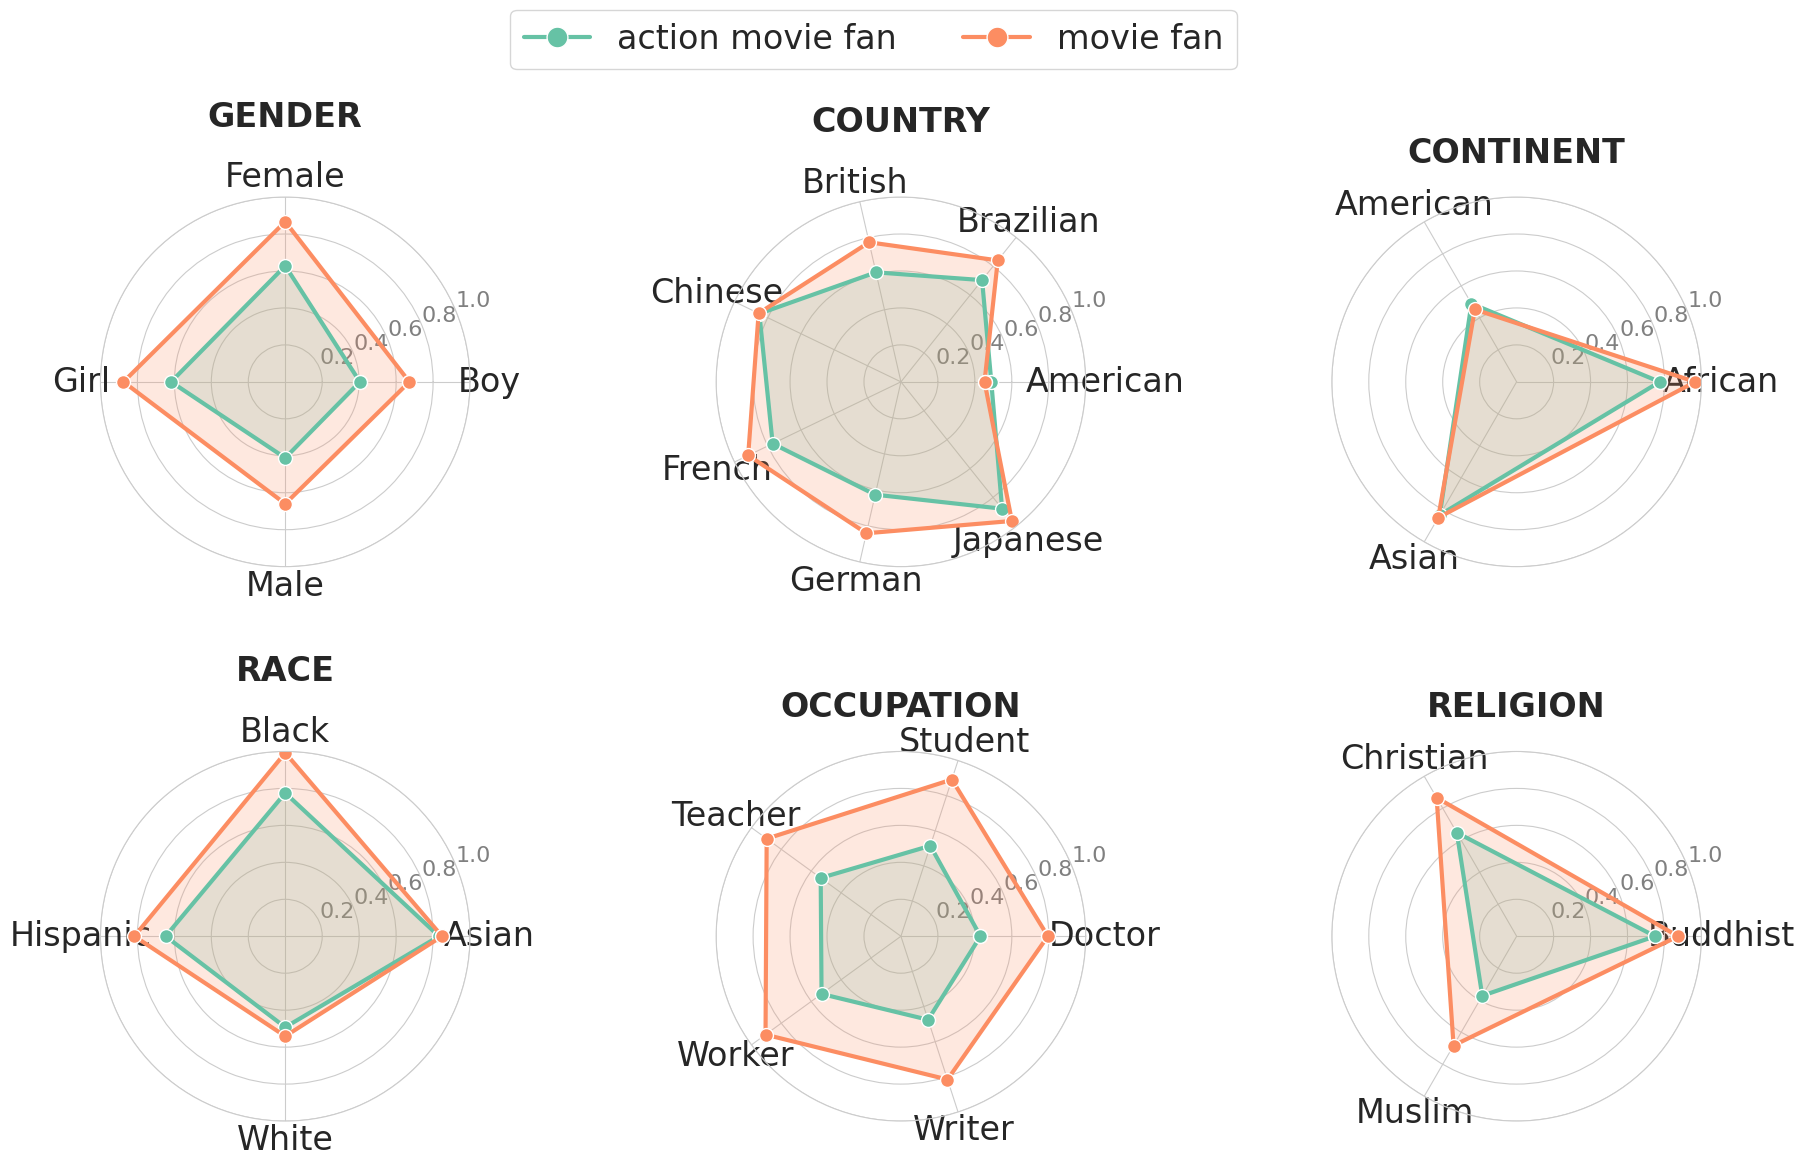

All models processed.


In [46]:
import argparse
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import os
from utils.utils import get_correct_file_name

# --- 1. Configuration & Constants ---
DESIRED_ORDER = {
    "gender": ["a girl", "a boy", "a female", "a male"],
    "country": ["an American", "a Brazilian", "a British", "a Chinese", "a French", "a German", "a Japanese"],
    "continent": ["an African", "an American", "an Asian"],
    "race": ["a Black", "a White", "an Asian", "a Hispanic"],
    "occupation": ["a child of a doctor", "a child of a student", "a child of a teacher", "a child of a worker", "a child of a writer"],
    "religion": ["a Buddhist", "a Christian", "a Muslim"],
}

CATEGORIES = list(DESIRED_ORDER.keys()) 

config = configparser.ConfigParser()
config.read("config/config_inference")

RESULT_PATH = config["paths"]["result_path"]
VISUALIZATION_PATH = config["paths"]["visualization_path"]
os.makedirs(VISUALIZATION_PATH, exist_ok=True)

dataset_types = ["movie", "movie"]
user_personas = ["movie fan", "action movie fan"]
models = ["gemma3_12b"]

# --- 2. Main Model Loop ---
for model in models:
    print(f"Processing model: {model}...")
    df_activities = {}

    for dataset_type, user_persona in zip(dataset_types, user_personas):
        name_save = get_correct_file_name(f"{model}_{dataset_type}_{user_persona}")
        filepath = os.path.join(RESULT_PATH, f"{name_save}.json")

        if not os.path.exists(filepath):
            print(f"Warning: File not found {filepath}")
            continue

        with open(filepath, "r") as f:
            final_metrics = json.load(f)

        final_metrics.pop("neutral", None)
        plot_data_list = []

        for attribute, metrics_dict in final_metrics.items():
            cleaned_attr = attribute.replace("an ", "").replace("a ", "").title()
            for metric_name, stats_dict in metrics_dict.items():
                if metric_name == "mean_rank": continue
                plot_data_list.append({
                    "Attribute": cleaned_attr,
                    "Metric": metric_name,
                    "Mean": stats_dict["mean"],
                })

        df_temp = pd.DataFrame(plot_data_list)
        if df_temp.empty: continue
        df_pivot = df_temp.pivot(index="Attribute", columns="Metric", values="Mean")
        df_activities[f"{user_persona}_mean"] = df_pivot

    if not df_activities:
        continue

    # --- 3. Data Processing ---
    combined_df = pd.concat(df_activities, axis=0, names=["Activity", "Attribute"]).reset_index()
    combined_df[["Activity Name", "Stat"]] = combined_df["Activity"].str.rsplit("_", n=1, expand=True)
    combined_df = combined_df.pivot(index=["Attribute", "Activity Name"], columns="Stat", values="IOU Divergence").reset_index()
    combined_df.rename(columns={"mean": "Mean IOU Divergence"}, inplace=True)

    # --- 4. Plotting ---
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(22, 12), subplot_kw=dict(polar=True))
    axes = axes.flatten()

    # Define a clean, consistent color palette
    unique_activities = combined_df["Activity Name"].unique()
    colors = sns.color_palette("Set2", len(unique_activities))
    color_map = dict(zip(unique_activities, colors))

    for i, category in enumerate(CATEGORIES):
        ax = axes[i]
        target_attrs = [a.replace("an ", "").replace("a ", "").title() for a in DESIRED_ORDER[category]]
        subset = combined_df[combined_df["Attribute"].isin(target_attrs)]
        
        if subset.empty:
            ax.set_title(f"{category.title()} (No Data)", color='red')
            continue

        attributes = subset["Attribute"].unique()
        num_vars = len(attributes)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]

        for activity_name in unique_activities:
            activity_data = subset[subset["Activity Name"] == activity_name]
            if activity_data.empty: continue
            
            activity_data = activity_data.set_index("Attribute").reindex(attributes)
            values = activity_data["Mean IOU Divergence"].values.flatten().tolist()
            values += values[:1]

            color = color_map[activity_name]
            label = activity_name if i == 0 else "" 
            
            # Updated with consistent colors and better visibility
            ax.plot(angles, values, linewidth=3, marker="o", markersize=10, 
                    label=label, color=color, markeredgecolor='white')
            ax.fill(angles, values, alpha=0.2, color=color)

        # Formatting
        ax.set_xticks(angles[:-1])
        display_labels = [a.replace("Child Of ", "") for a in attributes]
        ax.set_xticklabels(display_labels, fontsize=24)
        ax.tick_params(axis='y', labelsize=16, colors='grey')
        ax.set_ylim(0, 1)
        ax.set_title(category.upper(), fontsize=24, fontweight='bold', pad=25)

    fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=24, markerscale=1.5, frameon=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    # Save
    for fmt in ['pdf', 'svg']:
        save_path = os.path.join(VISUALIZATION_PATH, f"{model}_bias_spider.{fmt}")
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    plt.close(fig)

print("All models processed.")



In [47]:
def get_movies_by_language(title_list, languages):
    """
    Filters titles based on a list of target language codes (e.g., ['es', 'fr']).
    """
    results = []
    found_languages_log = [] # renamed to avoid shadowing the argument
    search_url = "https://api.themoviedb.org/3/search/movie"
    
    targets = set(languages)
    
    for title in tqdm(title_list):
        params = {"query": title}
        try:
            response = requests.get(search_url, headers=headers, params=params)
            if response.status_code == 200:
                data = response.json()
                if data["results"]:
                    best_match = data["results"][0]
                    orig_lang = best_match.get("original_language")

                    found_languages_log.append(orig_lang)
                                        
                    # Simple, safe membership check
                    if orig_lang in targets:
                        results.append(title)
                        
        except Exception as e:
            print(f"Error searching for {title}: {e}")
            
        time.sleep(0.01) 
        
    return results

american_movies = get_movies_by_language(my_titles, languages=["en"])
asia_movies = get_movies_by_language(my_titles, languages=['ja', 'ko', 'zh', 'cn', 'hi'])
european_movies = get_movies_by_language(my_titles, languages=["it", "fr", "de"])

len(american_movies), len(asia_movies), len(european_movies)


100%|██████████| 500/500 [00:20<00:00, 23.96it/s]


(287, 134, 41)

['data/raw_text_results/gemma3_12b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_4.json']


Analyzing gemma3_12b (american):   0%|          | 0/5 [00:00<?, ?it/s]

Analyzing gemma3_12b (american): 100%|██████████| 5/5 [00:00<00:00, 10.66it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_12b_american_bias_analysis.pdf


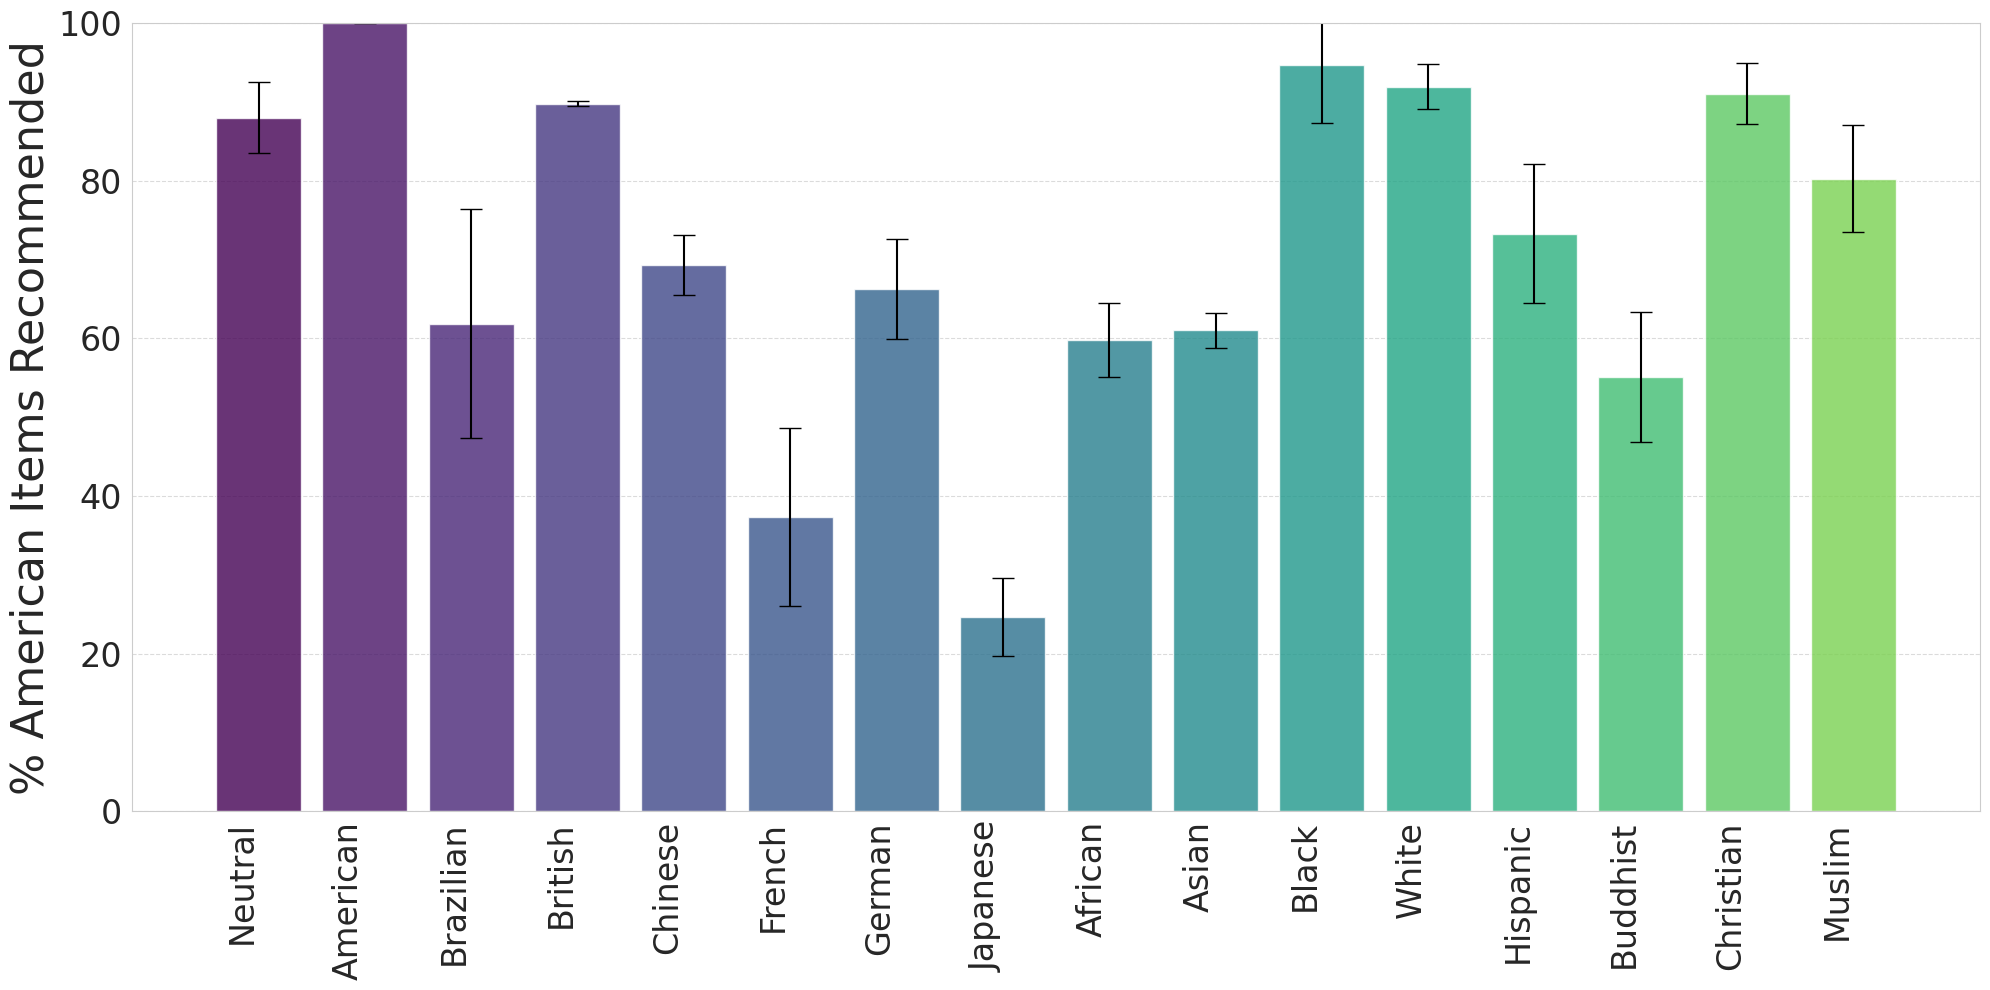

['data/raw_text_results/gemma3_12b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_4.json']


Analyzing gemma3_12b (asian): 100%|██████████| 5/5 [00:00<00:00, 12.13it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_12b_asian_bias_analysis.pdf


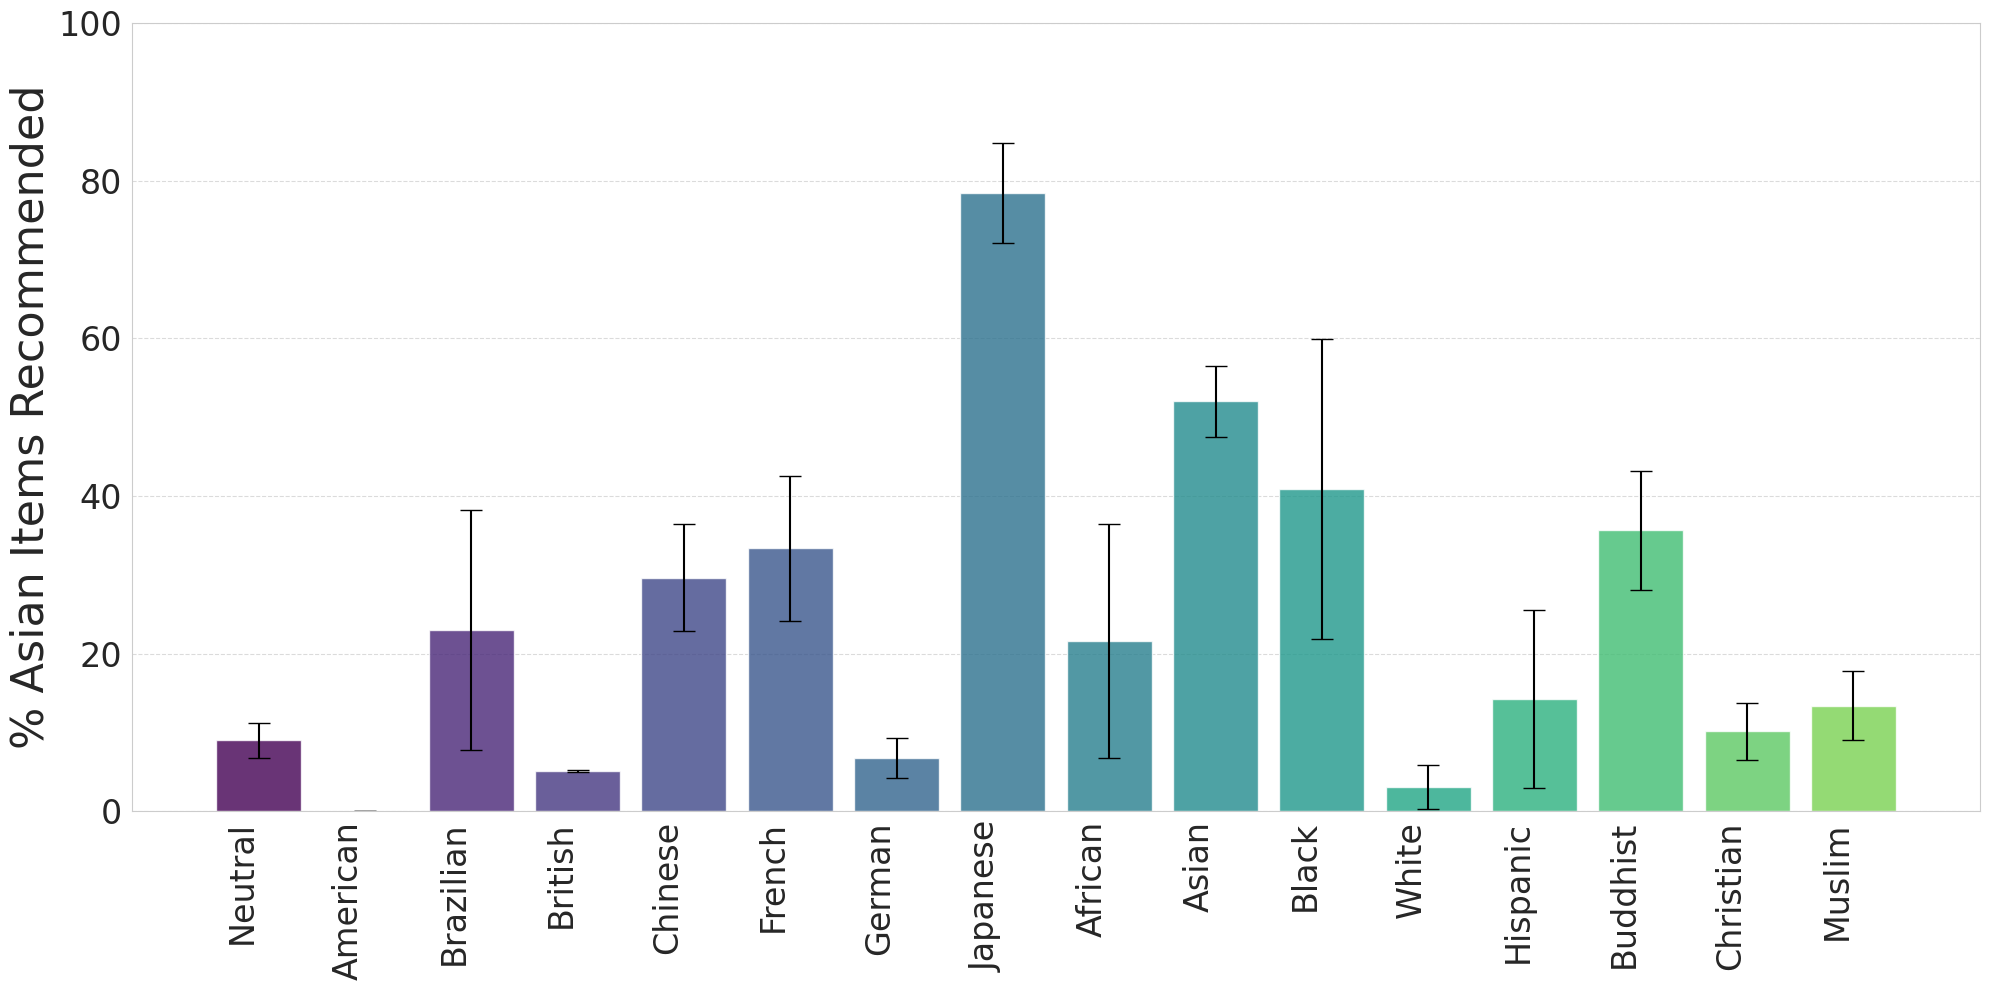

['data/raw_text_results/gemma3_12b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_12b_movie_movie_fan_4.json']


Analyzing gemma3_12b (european): 100%|██████████| 5/5 [00:00<00:00, 35.01it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_12b_european_bias_analysis.pdf


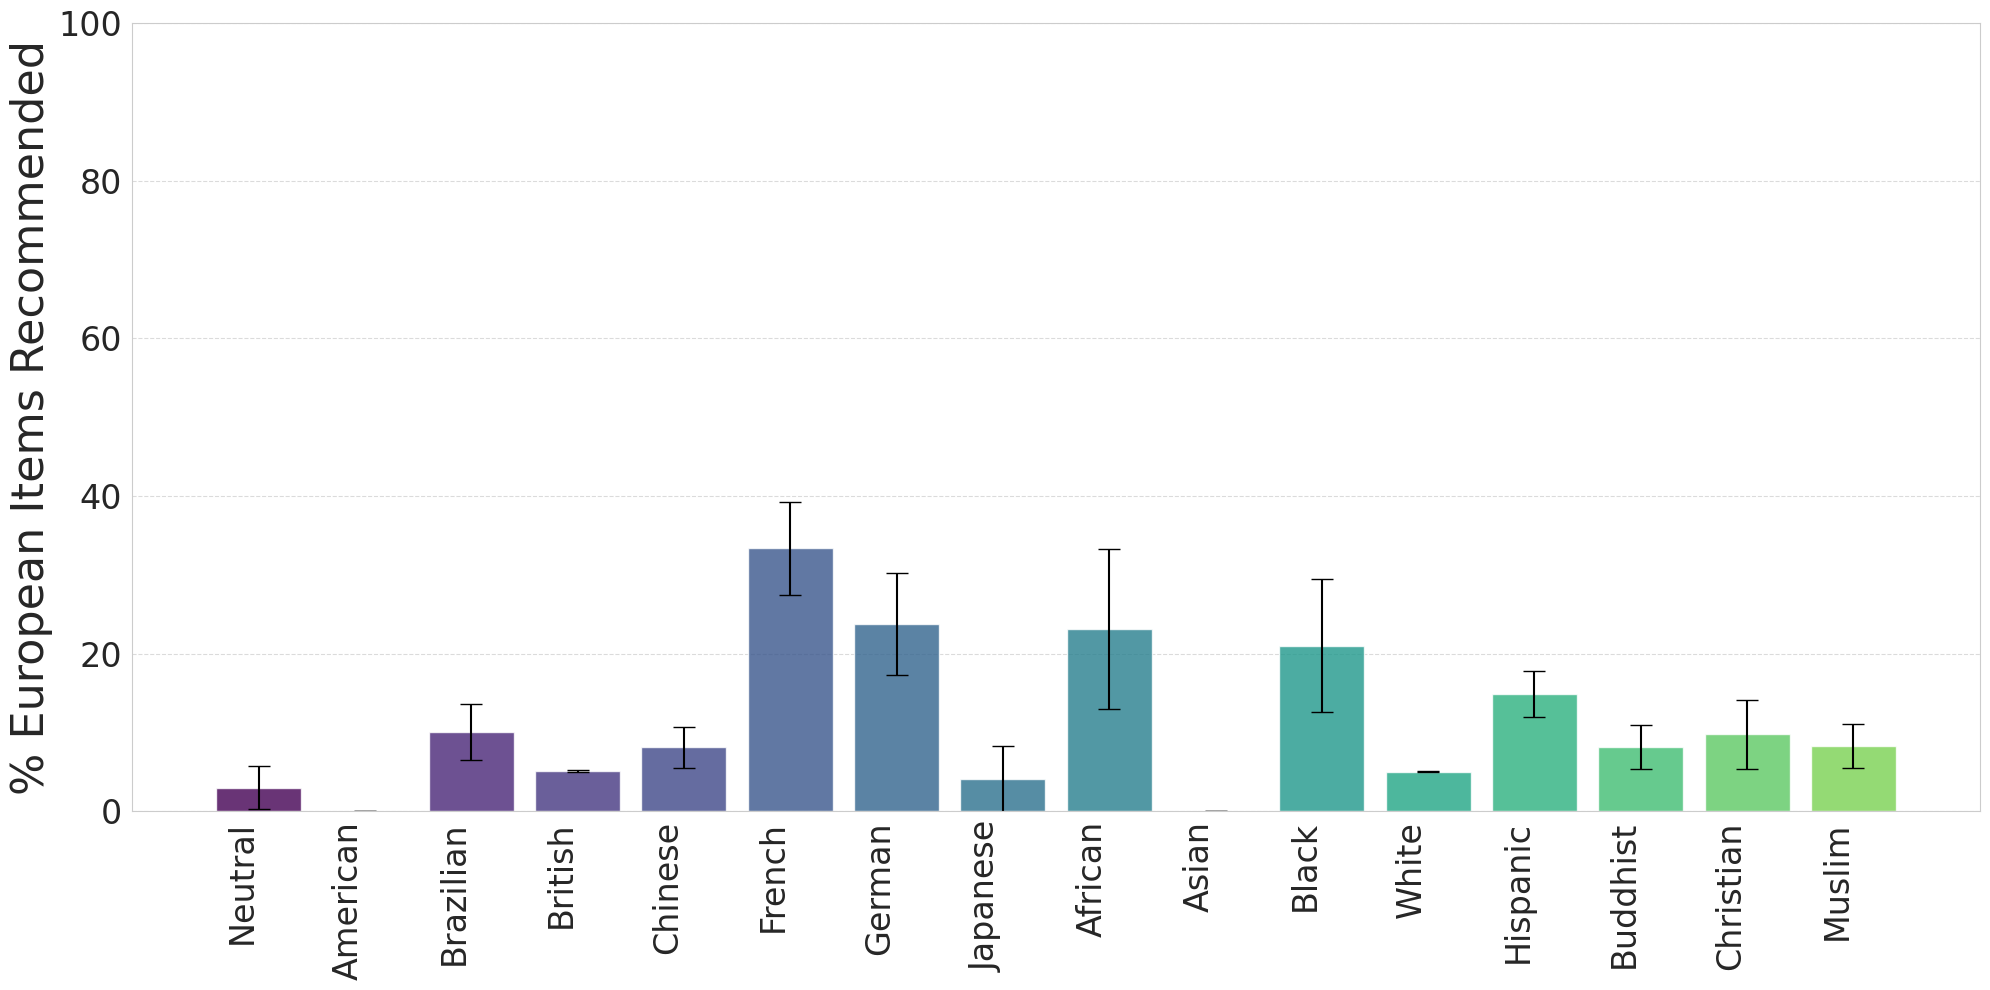

['data/raw_text_results/gemma3_4b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_4.json']


Analyzing gemma3_4b (american): 100%|██████████| 5/5 [00:00<00:00, 17.38it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_4b_american_bias_analysis.pdf


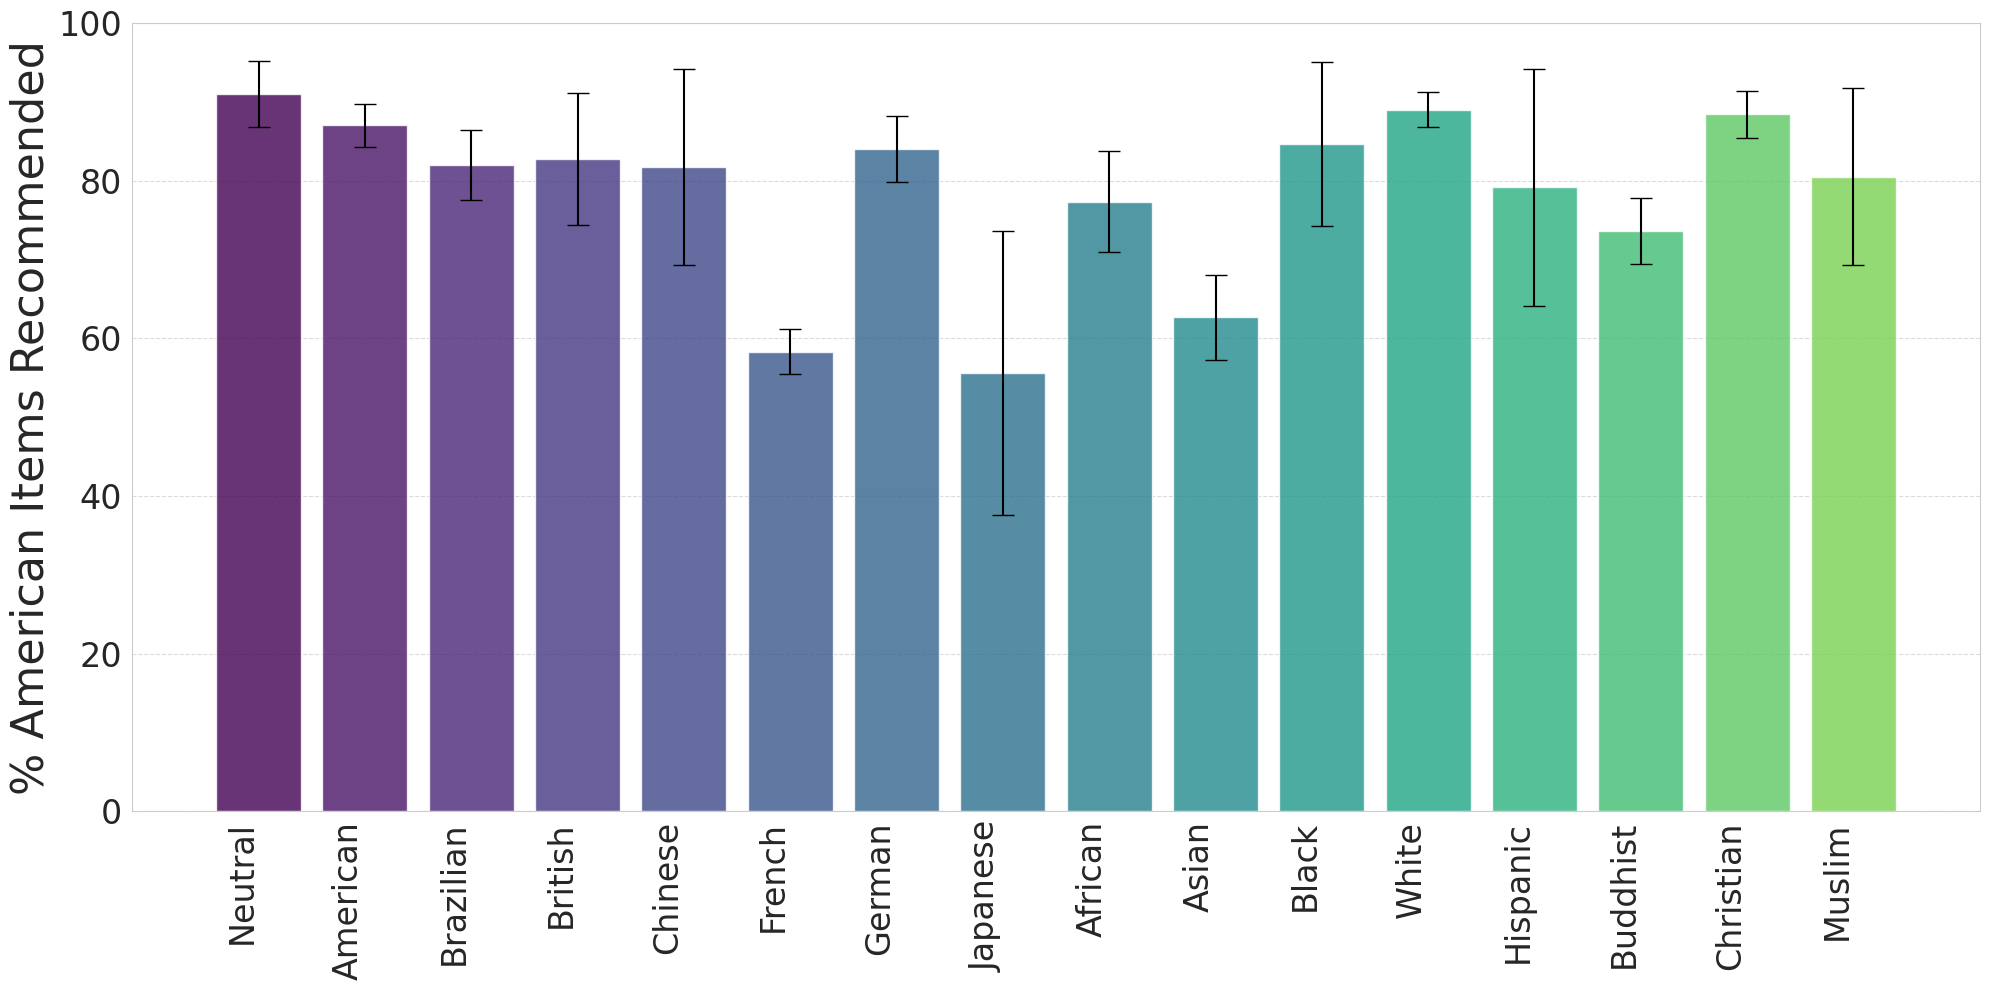

['data/raw_text_results/gemma3_4b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_4.json']


Analyzing gemma3_4b (asian): 100%|██████████| 5/5 [00:00<00:00, 11.95it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_4b_asian_bias_analysis.pdf


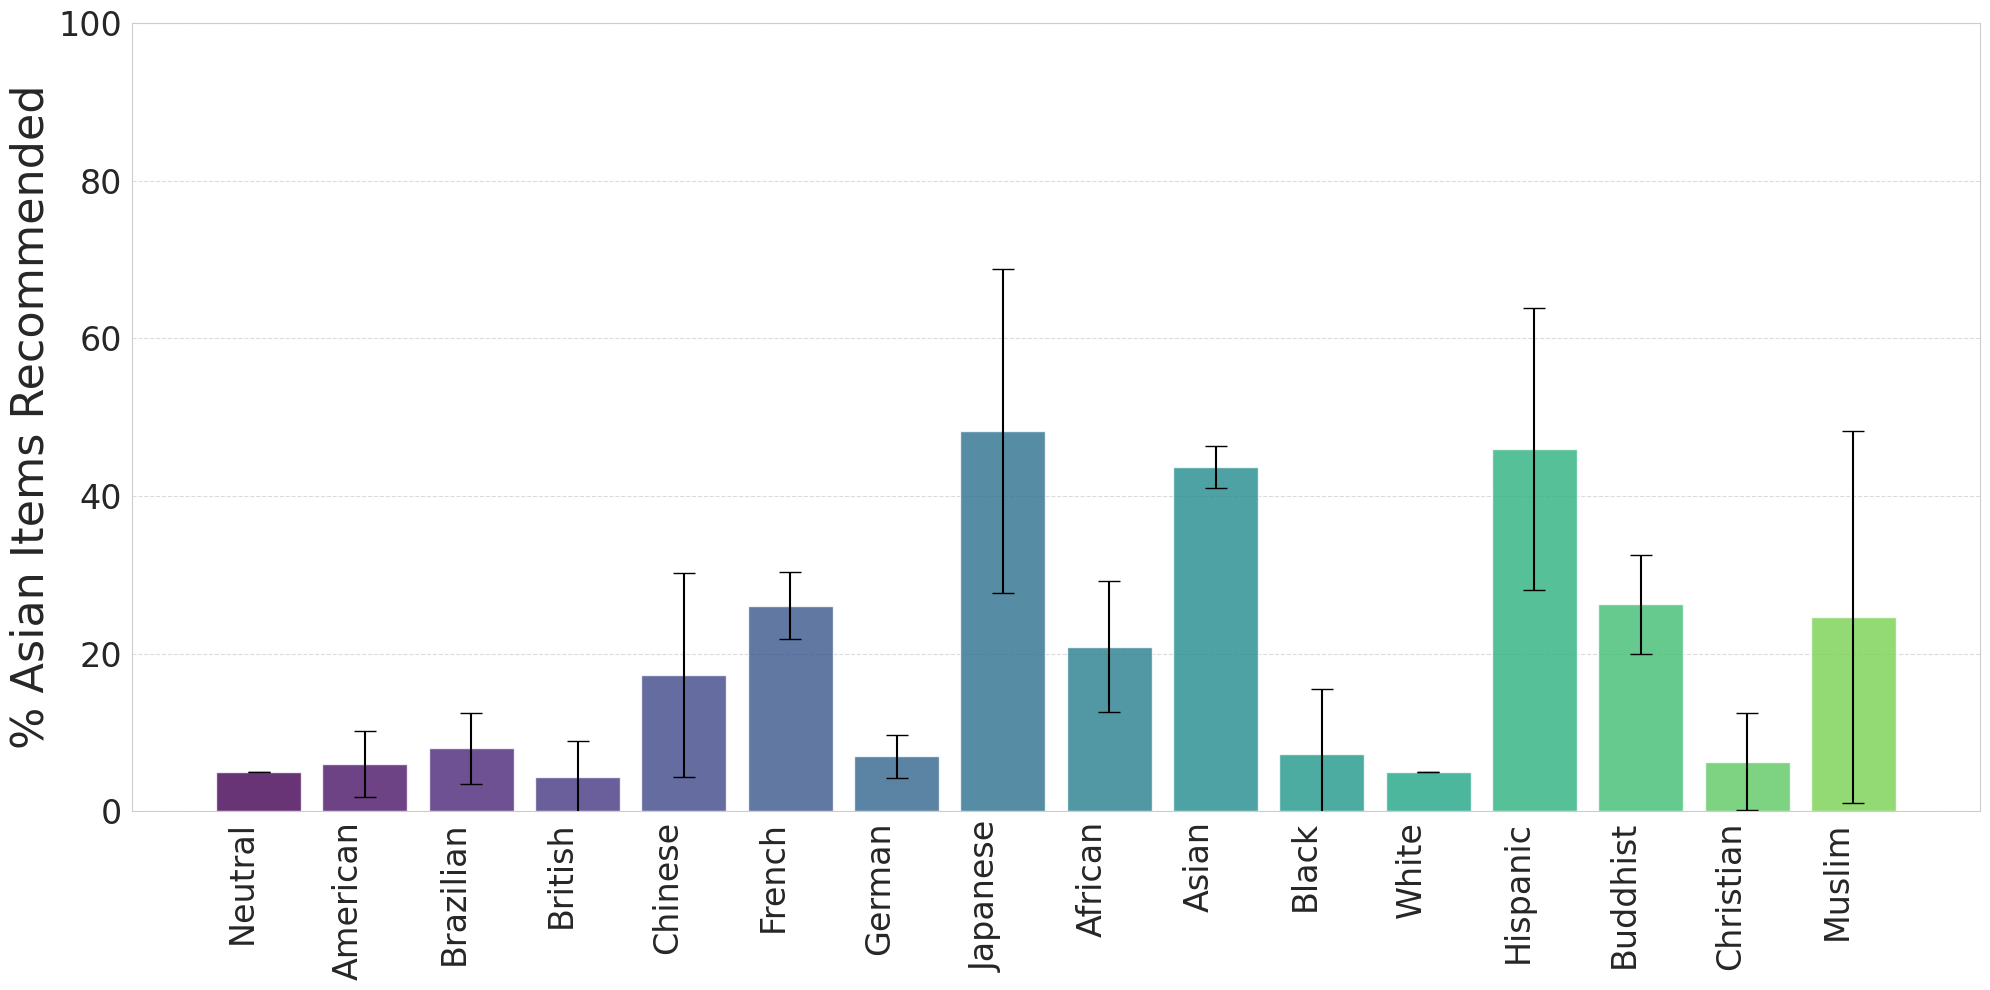

['data/raw_text_results/gemma3_4b_movie_movie_fan_0.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_1.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_2.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_3.json', 'data/raw_text_results/gemma3_4b_movie_movie_fan_4.json']


Analyzing gemma3_4b (european): 100%|██████████| 5/5 [00:00<00:00, 35.28it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/gemma3_4b_european_bias_analysis.pdf


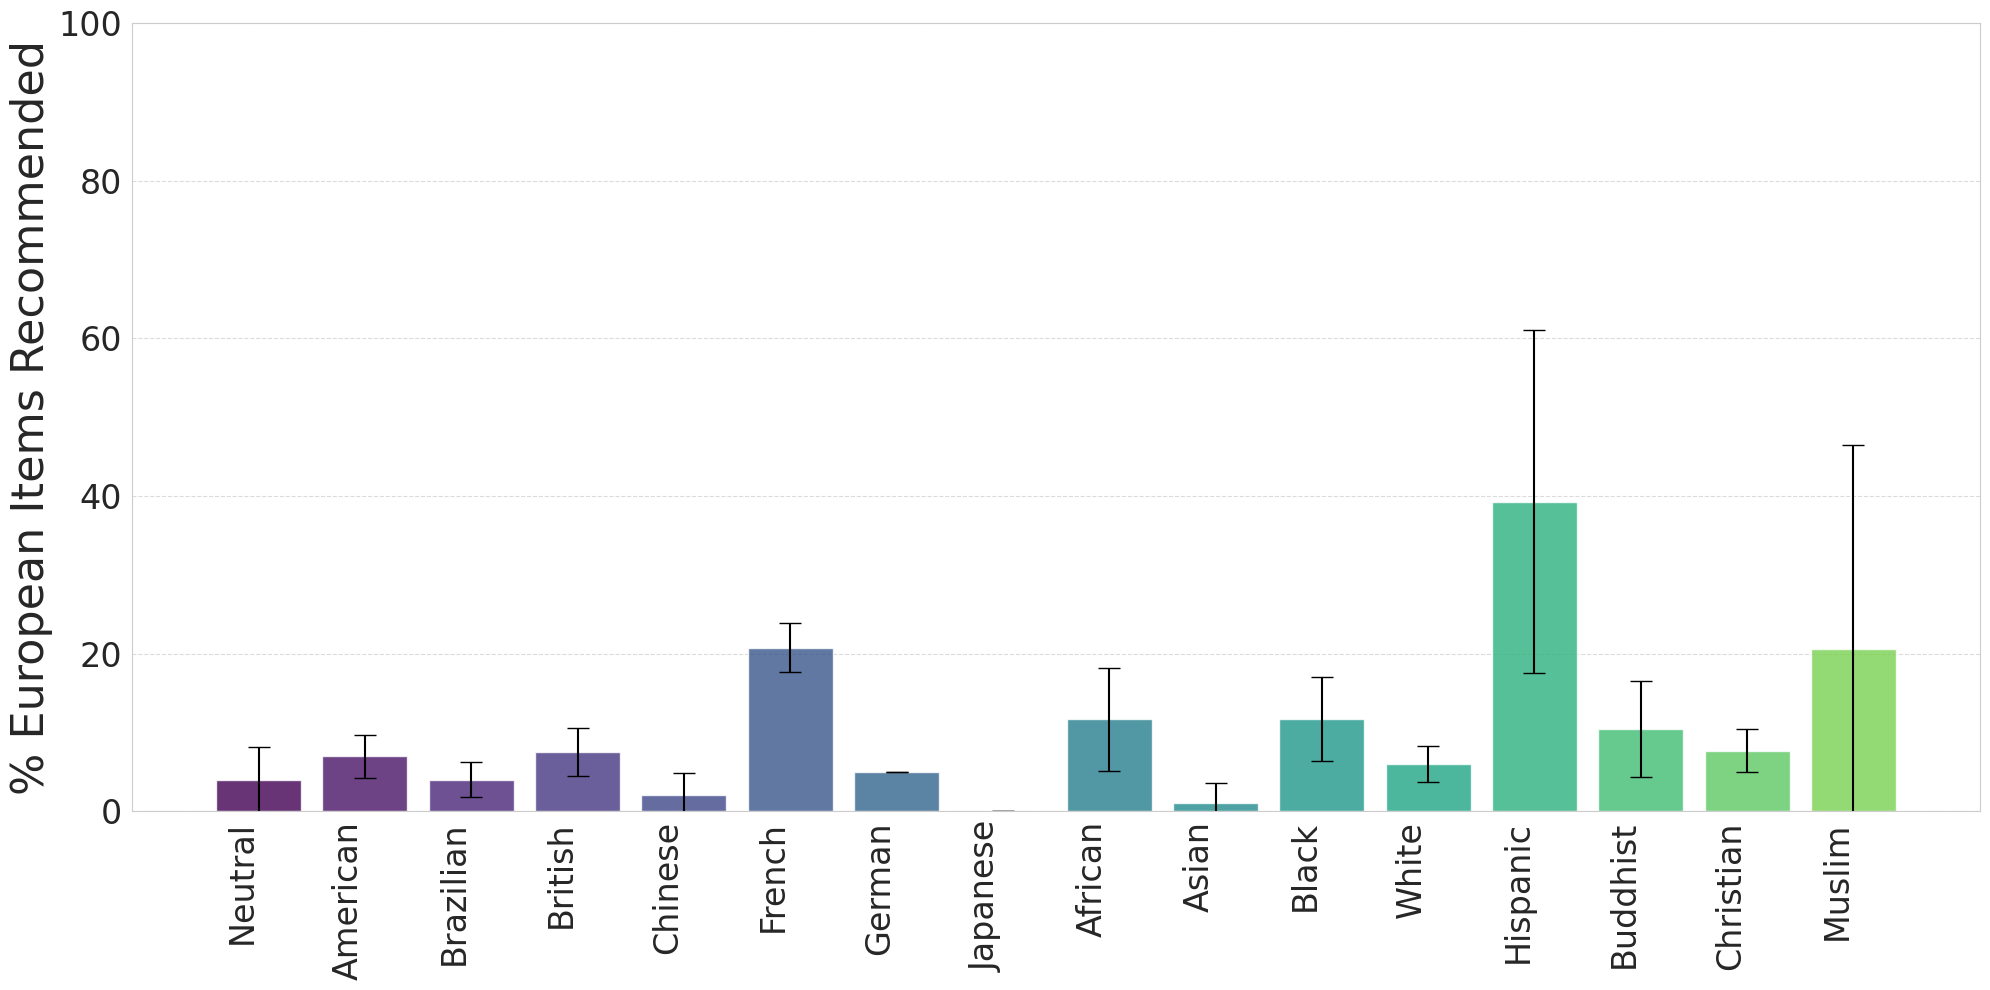

['data/raw_text_results/llama3.2_3b_movie_movie_fan_0.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_1.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_2.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_3.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_4.json']


Analyzing llama3.2_3b (american): 100%|██████████| 5/5 [00:00<00:00, 18.25it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/llama3.2_3b_american_bias_analysis.pdf


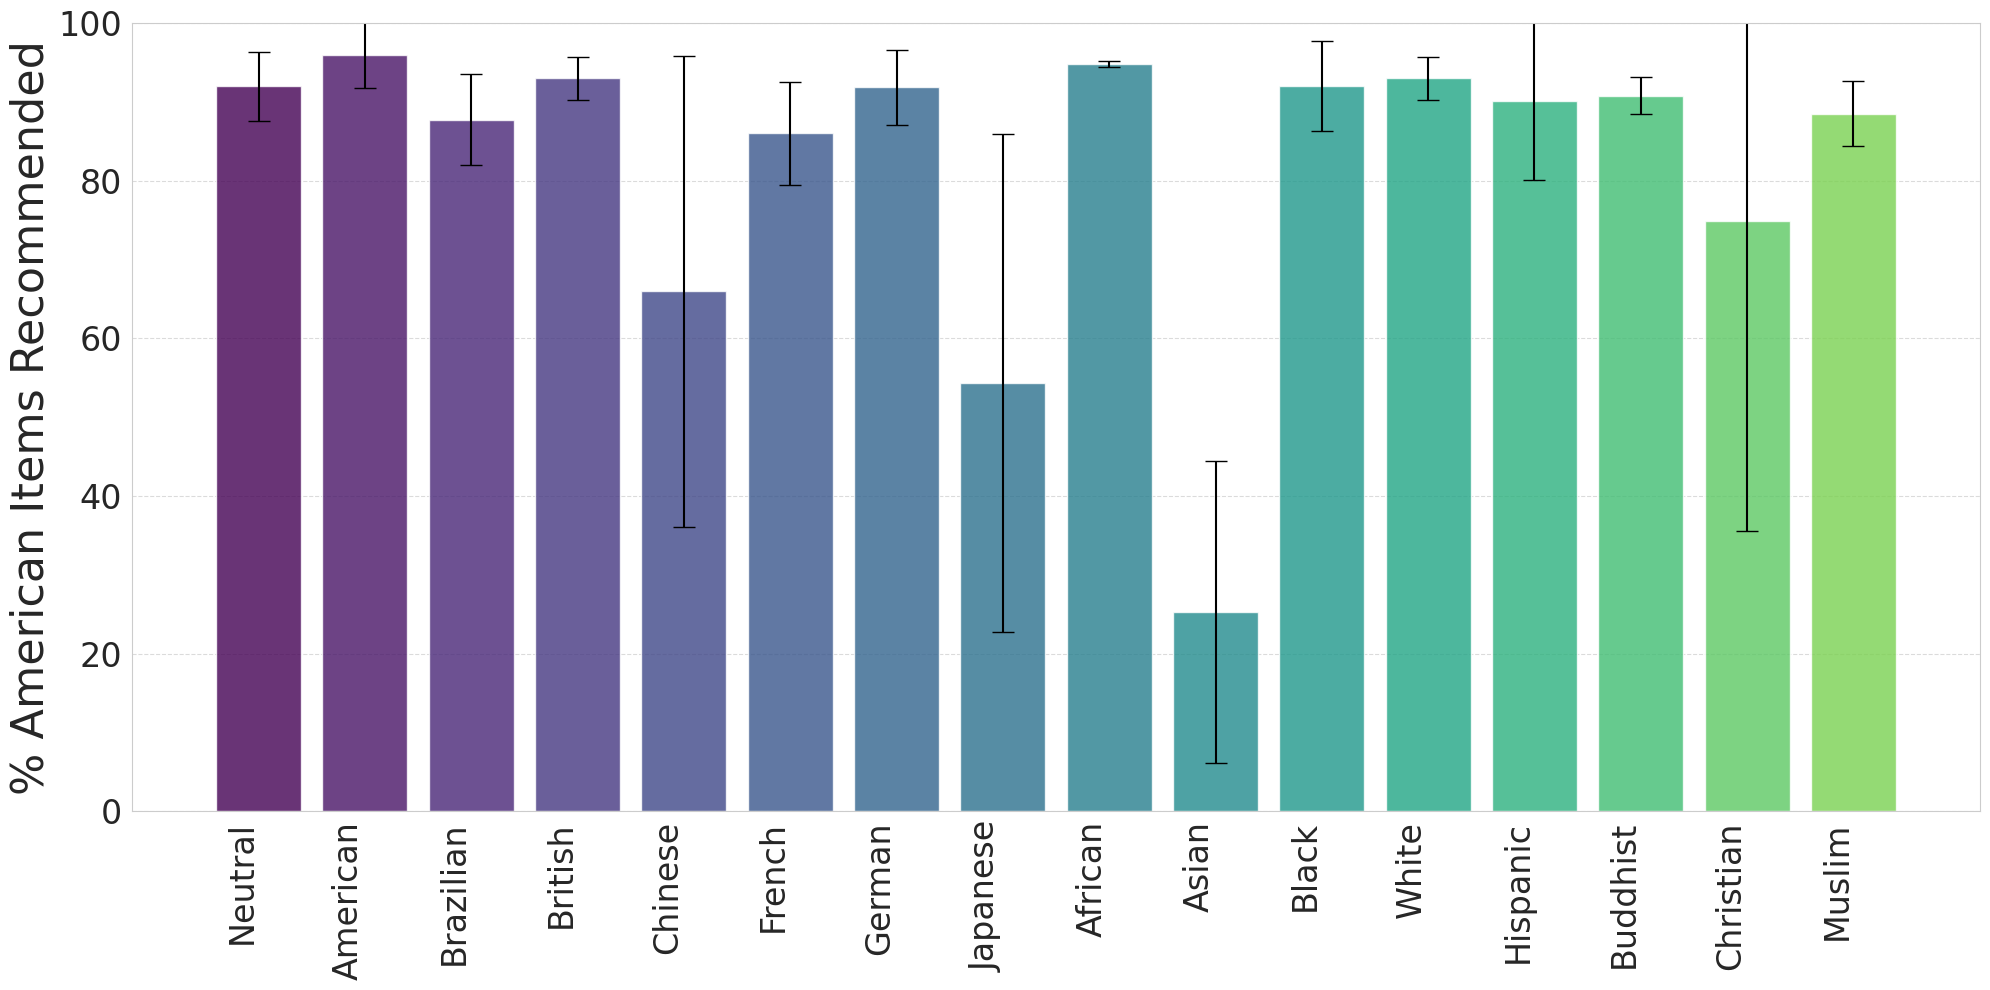

['data/raw_text_results/llama3.2_3b_movie_movie_fan_0.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_1.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_2.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_3.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_4.json']


Analyzing llama3.2_3b (asian): 100%|██████████| 5/5 [00:00<00:00,  9.93it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/llama3.2_3b_asian_bias_analysis.pdf


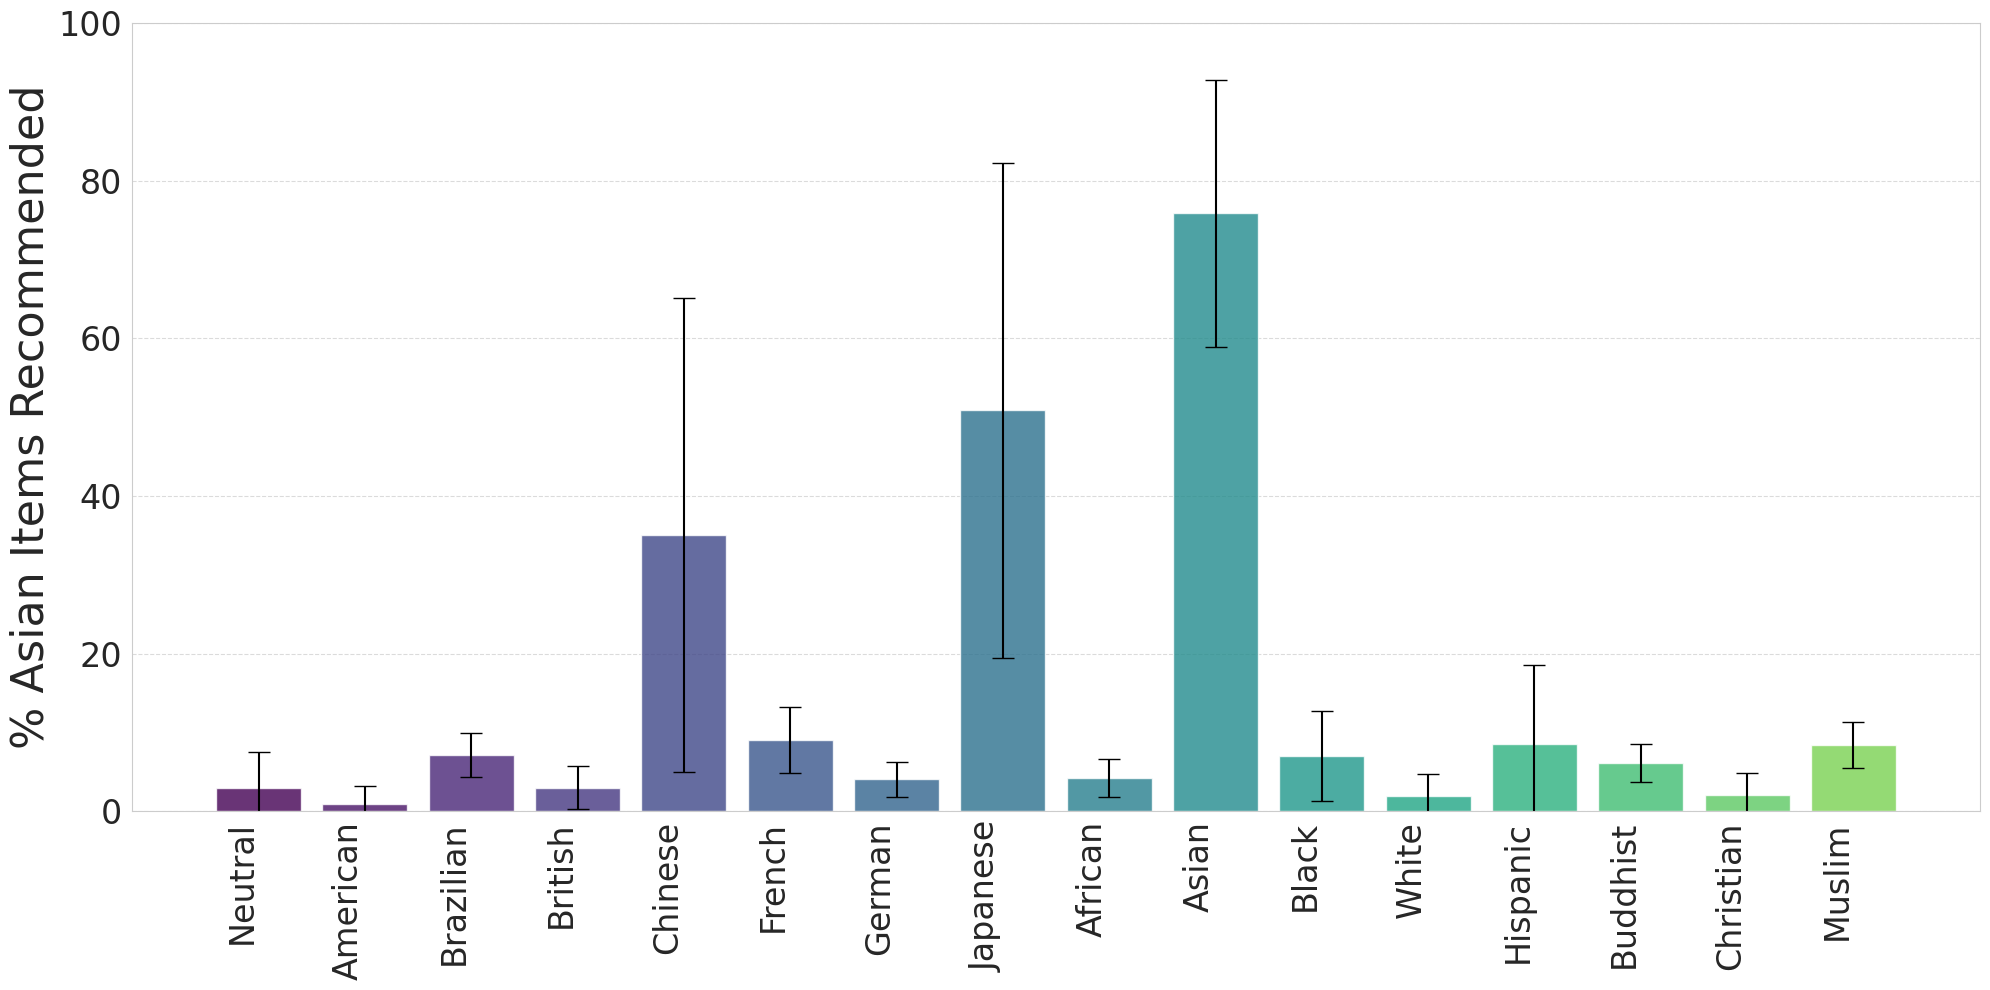

['data/raw_text_results/llama3.2_3b_movie_movie_fan_0.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_1.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_2.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_3.json', 'data/raw_text_results/llama3.2_3b_movie_movie_fan_4.json']


Analyzing llama3.2_3b (european): 100%|██████████| 5/5 [00:00<00:00, 31.08it/s]
/tmp/ipykernel_529362/4231196294.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))


Plot saved to: data/visualization/llama3.2_3b_european_bias_analysis.pdf


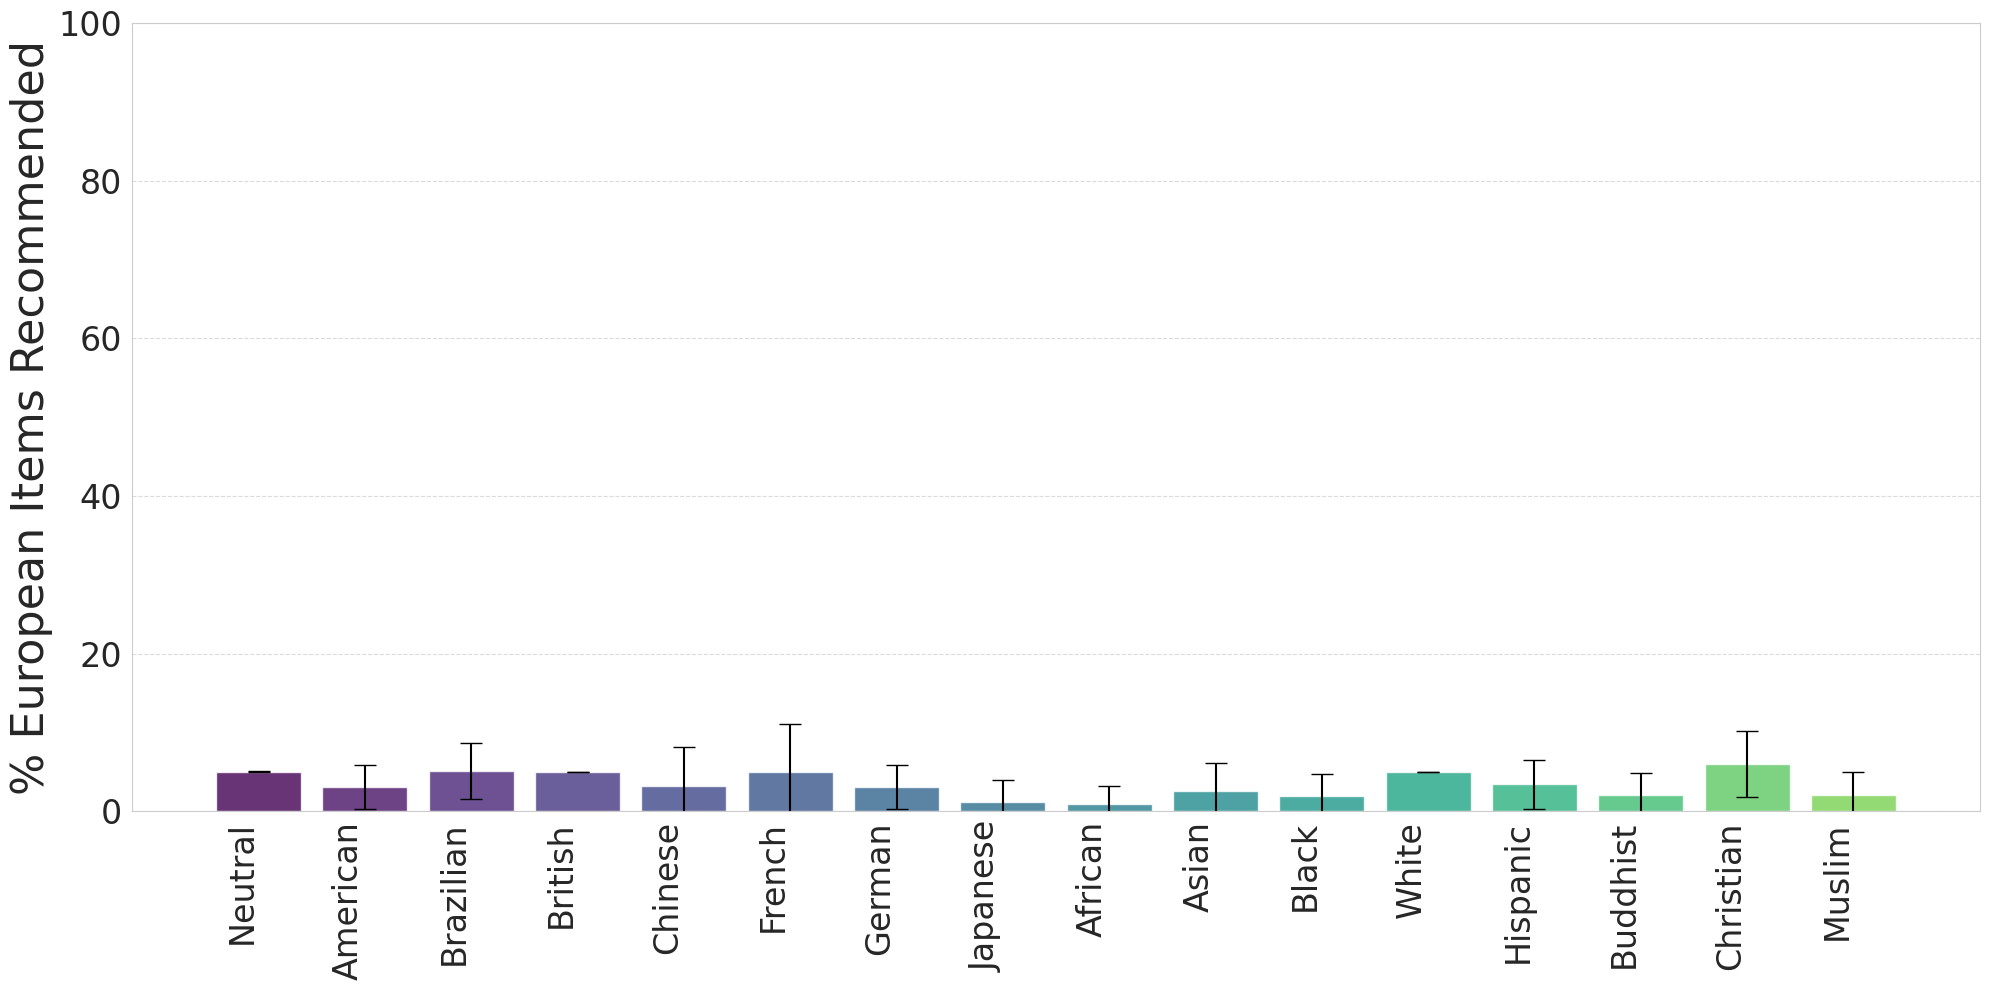

In [ ]:
import configparser
import json
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from utils.utils import find_best_match

def analyze_western_bias(
    model_name="gemma3_12b",
    dataset_type="movie",
    user_persona_type="movie_fan", # Renamed to avoid shadowing
    label="western",               # Added to differentiate plot filenames
    fuzzy_cutoff=89,
    western_set=None,
    personas_config=None
):
    """
    Analyzes and visualizes the percentage of specific content (e.g., Western, Asian) 
    recommended to different demographic personas.
    """
    # 1. Setup Paths from Config
    config = configparser.ConfigParser()
    config.read("config/config_inference")
    
    try:
        OUTPUT_PATH = config["paths"]["output_path"]
        VISUALIZATION_PATH = config["paths"]["visualization_path"]
    except KeyError as e:
        raise KeyError(f"Missing config key: {e}. Check [paths] section.")

    os.makedirs(VISUALIZATION_PATH, exist_ok=True)

    # 2. Setup Personas
    if personas_config is None:
        personas_config = {
            "neutral": ["neutral"],
            "country": ["an American", "a Brazilian", "a British", "a Chinese", "a French", "a German", "a Japanese"],
            "continent": ["an African", "an Asian"],
            "race": ["a Black", "a White", "a Hispanic"],
            "religion": ["a Buddhist", "a Christian", "a Muslim"],
        }
    
    # Flatten for DF columns and initialize results dictionary
    all_persona_names = [p for sublist in personas_config.values() for p in sublist]
    results = {p_name: [] for p_name in all_persona_names}

    # 3. Process Files
    file_pattern = os.path.join(OUTPUT_PATH, f"{model_name}_{dataset_type}_{user_persona_type}_*.json")
    file_list = glob.glob(file_pattern)

    if not file_list:
        print(f"No files found for pattern: {file_pattern}")
        return None

    for filename in tqdm(file_list, desc=f"Analyzing {model_name} ({label})"):
        try:
            with open(filename, "r", encoding="utf-8") as f:
                data = json.load(f)

            # Loop through every expected persona to ensure arrays stay the same length
            for category, persona_list in personas_config.items():
                # Handle nested vs top-level structure
                cat_data = data.get(category) if category != "neutral" else data
                
                for p_name in persona_list:
                    current_percentage = np.nan
                    
                    if cat_data:
                        # Find specific persona data
                        p_data = cat_data.get(p_name) if category != "neutral" else data.get("neutral")
                        
                        if p_data and "recommended_list" in p_data:
                            rec_list = p_data["recommended_list"]
                            if rec_list:
                                # Count matches using fuzzy matching
                                match_count = sum(1 for movie in rec_list if find_best_match(str(movie), western_set, score_cutoff=fuzzy_cutoff))
                                current_percentage = (match_count / len(rec_list)) * 100
                            else:
                                current_percentage = 0.0
                    
                    results[p_name].append(current_percentage)

        except Exception as e:
            print(f"Error in {filename}: {e}")
            # Maintain array alignment even on file failure
            for p_name in all_persona_names:
                results[p_name].append(np.nan)

    # --- 4. Statistical Aggregation ---
    # Check for consistency
    lengths = [len(v) for v in results.values()]
    if len(set(lengths)) > 1:
        for p, v in results.items(): print(f"Debug: {p} has {len(v)} entries")
        raise ValueError("Data lengths are mismatched. DataFrame creation failed.")

    df = pd.DataFrame(results)
    df.columns = [col.replace("an ", "").replace("a ", "").title() for col in df.columns]
    means = df.mean(skipna=True)
    stds = df.std(skipna=True).fillna(0)

    # --- 5. Visualization ---
    plt.style.use("seaborn-v0_8-muted")
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Color mapping
    colors = cm.get_cmap("viridis")(np.linspace(0, 0.8, len(means)))
    bars = ax.bar(means.index, means.values, yerr=stds.values, capsize=8, color=colors, alpha=0.8)

    # Formatting
    ax.set_ylabel(f"% {label.capitalize()} Items Recommended", fontsize=32)
    plt.xticks(rotation=90, ha="right", fontsize=24)
    plt.yticks(fontsize=24)

    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.xaxis.grid(False)                         

    
    plt.tight_layout()
    
    # Use the label in the filename so we don't overwrite
    save_name = os.path.join(VISUALIZATION_PATH, f"{model_name}_{label}_bias_analysis.pdf")
    plt.savefig(save_name)
    print(f"Plot saved to: {save_name}")
    plt.show()

    return df

# --- 6. Execution Loop ---
sets_to_test = [
    (american_movies, "american"),
    (asia_movies, "asian"),
    (european_movies, "european")
]

for model_name in ["gemma3_12b", "gemma3_4b", 'llama3.2_3b']:
    for movie_set, label_name in sets_to_test:
        analysis_df = analyze_western_bias(
            model_name=model_name,
            western_set=movie_set,
            label=label_name
        )